### Reference:https://www.datacamp.com/community/tutorials/scikit-learn-fake-news

In [43]:
import pandas as pd
from sklearn.cross_validation import train_test_split

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [44]:
#https://stackoverflow.com/questions/41252311/itertools-not-defined-when-used-inside-module
import itertools    
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        import itertools
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [5]:
df=pd.read_csv("fake_or_real_news.csv")

In [6]:
df.shape

(6335, 4)

In [7]:
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [8]:
df.set_index("Unnamed: 0")        

title  \
Unnamed: 0                                                      
8476                             You Can Smell Hillary’s Fear   
10294       Watch The Exact Moment Paul Ryan Committed Pol...   
3608              Kerry to go to Paris in gesture of sympathy   
10142       Bernie supporters on Twitter erupt in anger ag...   
875          The Battle of New York: Why This Primary Matters   
6903                                              Tehran, USA   
7341        Girl Horrified At What She Watches Boyfriend D...   
95                          ‘Britain’s Schindler’ Dies at 106   
4869        Fact check: Trump and Clinton at the 'commande...   
2909        Iran reportedly makes new push for uranium con...   
1357        With all three Clintons in Iowa, a glimpse at ...   
988         Donald Trump’s Shockingly Weak Delegate Game S...   
7041        Strong Solar Storm, Tech Risks Today | S0 News...   
7623             10 Ways America Is Preparing for World War 3   
1571                         Trump takes on Cruz, but lightly   
4739                               How women lead differently   
7737        Shocking! Michele Obama & Hillary Caught Glamo...   
8716        Hillary Clinton in HUGE Trouble After America ...   
3304        What's in that Iran bill that Obama doesn't like?   
3078        The 1 chart that explains everything you need ...   
2517        The slippery slope to Trump’s proposed ban on ...   
10348       Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...   
778         Hillary Clinton Makes A Bipartisan Appeal on S...   
3300        New Senate majority leader’s main goal for GOP...   
6155                    ‘Inferno’ and the Overpopulation Myth   
636         Anti-Trump forces seek last-ditch delegate revolt   
755         Sanders Trounces Clinton in W. Va. -- But Will...   
626         Donald Trump Is Changing His Campaign Slogan t...   
691         Pure chaos: Donald Trump’s campaign management...   
5743        Syrian War Report – November 1, 2016: Syrian M...   
...                                                       ...   
6457        Colin Kaepernick hosts ‘Know Your Rights’ camp...   
7030        Wikileaks Emails Disclose Aliens Linked to Vat...   
9013        US abstains from UN vote calling for end to Cu...   
9509        West Ham fans laud aerodynamic properties of n...   
3825            How the Obama White House runs foreign policy   
4515        ISIS claims responsibility for Garland, Texas,...   
2747        The “blame the left” crew: What the right’s ne...   
6516        ADHD NATION: How Big Pharma Created the ADHD E...   
9636        Donald Trump claims the election will be 'rigg...   
7398        REPORT: Dirty Reporter Blackmails Montel… Help...   
3717        Police Arrest Suspect In Charleston Church Sho...   
5205        Donald Trump’s collapse was caused by one big ...   
6696        FINA suspends Russian swimmer for 8 years over...   
7991        BREAKING : Hillary Campaign Manager Deletes hi...   
1303        Why Ted Cruz Has the Most to Lose in New Hamps...   
9051        “Nothing Good Can Come of This Election”–and T...   
10200        List of Republicans opposing Trump | OffGuardian   
10009       Putin: Use of 'mythical' Russian military thre...   
4214        Bernie Sanders says private meeting with Pope ...   
2316        Alabama Lawmaker: Same-Sex Couples Don’t Deser...   
8411        Will the Media Reset After the Election or Are...   
6143        DOJ COMPLAINT: Comey Under Fire Over Partisan ...   
3262        GOP Senator David Perdue Jokes About Praying f...   
9337        Radio Derb Is On The Air–Leonardo And Brazil’s...   
8737        Assange claims ‘crazed’ Clinton campaign tried...   
4490        State Department says it can't find emails fro...   
8062        The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
8622        Anti-Trump Protesters Are Tools of the Oligarc...   
4021        In Ethiopia, Obama seeks progress on peace, se...   
4330        Jeb Bush Is Su

In [9]:
df

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
5           6903                                        Tehran, USA   
6           7341  Girl Horrified At What She Watches Boyfriend D...   
7             95                  ‘Britain’s Schindler’ Dies at 106   
8           4869  Fact check: Trump and Clinton at the 'commande...   
9           2909  Iran reportedly makes new push for uranium con...   
10          1357  With all three Clintons in Iowa, a glimpse at ...   
11           988  Donald Trump’s Shockingly Weak Delegate Game S...   
12          7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13          7623       10 Ways America Is Preparing for World War 3   
14          1571                   Trump takes on Cruz, but lightly   
15          4739                         How women lead differently   
16          7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17          8716  Hillary Clinton in HUGE Trouble After America ...   
18          3304  What's in that Iran bill that Obama doesn't like?   
19          3078  The 1 chart that explains everything you need ...   
20          2517  The slippery slope to Trump’s proposed ban on ...   
21         10348  Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...   
22           778  Hillary Clinton Makes A Bipartisan Appeal on S...   
23          3300  New Senate majority leader’s main goal for GOP...   
24          6155              ‘Inferno’ and the Overpopulation Myth   
25           636  Anti-Trump forces seek last-ditch delegate revolt   
26           755  Sanders Trounces Clinton in W. Va. -- But Will...   
27           626  Donald Trump Is Changing His Campaign Slogan t...   
28           691  Pure chaos: Donald Trump’s campaign management...   
29          5743  Syrian War Report – November 1, 2016: Syrian M...   
...          ...                                                ...   
6305        6457  Colin Kaepernick hosts ‘Know Your Rights’ camp...   
6306        7030  Wikileaks Emails Disclose Aliens Linked to Vat...   
6307        9013  US abstains from UN vote calling for end to Cu...   
6308        9509  West Ham fans laud aerodynamic properties of n...   
6309        3825      How the Obama White House runs foreign policy   
6310        4515  ISIS claims responsibility for Garland, Texas,...   
6311        2747  The “blame the left” crew: What the right’s ne...   
6312        6516  ADHD NATION: How Big Pharma Created the ADHD E...   
6313        9636  Donald Trump claims the election will be 'rigg...   
6314        7398  REPORT: Dirty Reporter Blackmails Montel… Help...   
6315        3717  Police Arrest Suspect In Charleston Church Sho...   
6316        5205  Donald Trump’s collapse was caused by one big ...   
6317        6696  FINA suspends Russian swimmer for 8 years over...   
6318        7991  BREAKING : Hillary Campaign Manager Deletes hi...   
6319        1303  Why Ted Cruz Has the Most to Lose in New Hamps...   
6320        9051  “Nothing Good Can Come of This Election”–and T...   
6321       10200   List of Republicans opposing Trump | OffGuardian   
6322       10009  Putin: Use of 'mythical' Russian military thre...   
6323        4214  Bernie Sanders says private meeting with Pope ...   
6324        2316  Alabama Lawmaker: Same-Sex Couples Don’t Deser...   
6325        8411  Will the Media Reset After the Election or Are...   
6326        6143  DOJ COMPLAINT: Comey Under Fire Over Partisan ...   
6327        3262  GOP Senator David Perdue Jokes About Praying f...   
6328        9337  Radio Derb Is On The Air–Leonardo And Brazil’s...   
6329        8737  Assange clai

In [10]:
y= df['label']

In [11]:
df.drop('label',axis=1)

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
5           6903                                        Tehran, USA   
6           7341  Girl Horrified At What She Watches Boyfriend D...   
7             95                  ‘Britain’s Schindler’ Dies at 106   
8           4869  Fact check: Trump and Clinton at the 'commande...   
9           2909  Iran reportedly makes new push for uranium con...   
10          1357  With all three Clintons in Iowa, a glimpse at ...   
11           988  Donald Trump’s Shockingly Weak Delegate Game S...   
12          7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13          7623       10 Ways America Is Preparing for World War 3   
14          1571                   Trump takes on Cruz, but lightly   
15          4739                         How women lead differently   
16          7737  Shocking! Michele Obama & Hillary Caught Glamo...   
17          8716  Hillary Clinton in HUGE Trouble After America ...   
18          3304  What's in that Iran bill that Obama doesn't like?   
19          3078  The 1 chart that explains everything you need ...   
20          2517  The slippery slope to Trump’s proposed ban on ...   
21         10348  Episode #160 – SUNDAY WIRE: ‘Hail to the Deplo...   
22           778  Hillary Clinton Makes A Bipartisan Appeal on S...   
23          3300  New Senate majority leader’s main goal for GOP...   
24          6155              ‘Inferno’ and the Overpopulation Myth   
25           636  Anti-Trump forces seek last-ditch delegate revolt   
26           755  Sanders Trounces Clinton in W. Va. -- But Will...   
27           626  Donald Trump Is Changing His Campaign Slogan t...   
28           691  Pure chaos: Donald Trump’s campaign management...   
29          5743  Syrian War Report – November 1, 2016: Syrian M...   
...          ...                                                ...   
6305        6457  Colin Kaepernick hosts ‘Know Your Rights’ camp...   
6306        7030  Wikileaks Emails Disclose Aliens Linked to Vat...   
6307        9013  US abstains from UN vote calling for end to Cu...   
6308        9509  West Ham fans laud aerodynamic properties of n...   
6309        3825      How the Obama White House runs foreign policy   
6310        4515  ISIS claims responsibility for Garland, Texas,...   
6311        2747  The “blame the left” crew: What the right’s ne...   
6312        6516  ADHD NATION: How Big Pharma Created the ADHD E...   
6313        9636  Donald Trump claims the election will be 'rigg...   
6314        7398  REPORT: Dirty Reporter Blackmails Montel… Help...   
6315        3717  Police Arrest Suspect In Charleston Church Sho...   
6316        5205  Donald Trump’s collapse was caused by one big ...   
6317        6696  FINA suspends Russian swimmer for 8 years over...   
6318        7991  BREAKING : Hillary Campaign Manager Deletes hi...   
6319        1303  Why Ted Cruz Has the Most to Lose in New Hamps...   
6320        9051  “Nothing Good Can Come of This Election”–and T...   
6321       10200   List of Republicans opposing Trump | OffGuardian   
6322       10009  Putin: Use of 'mythical' Russian military thre...   
6323        4214  Bernie Sanders says private meeting with Pope ...   
6324        2316  Alabama Lawmaker: Same-Sex Couples Don’t Deser...   
6325        8411  Will the Media Reset After the Election or Are...   
6326        6143  DOJ COMPLAINT: Comey Under Fire Over Partisan ...   
6327        3262  GOP Senator David Perdue Jokes About Praying f...   
6328        9337  Radio Derb Is On The Air–Leonardo And Brazil’s...   
6329        8737  Assange clai

In [12]:
X=df

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [14]:
count_vectorizer =CountVectorizer(stop_words='english')

In [15]:
count_train = count_vectorizer.fit_transform(X_train)

In [16]:
count_test = count_vectorizer.transform(X_test)

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [18]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [19]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [20]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [21]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [22]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [23]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())


In [24]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [25]:
print(count_df.equals(tfidf_df))

False


In [26]:
count_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0   0    0     0         0       0      0     0       0      0      0  ...     
1   0    0     0         0       0      0     0       0      0      0  ...     
2   0    0     0         0       0      0     0       0      0      0  ...     
3   0    0     0         0       0      0     0       0      0      0  ...     
4   0    0     0         0       0      0     0       0      0      0  ...     

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]

In [27]:
tfidf_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
1  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
2  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
3  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
4  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     

   حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56922 columns]

# Comparing Models

In [28]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB() 

accuracy:   0.857
Confusion matrix, without normalization
[[ 739  269]
 [  31 1052]]


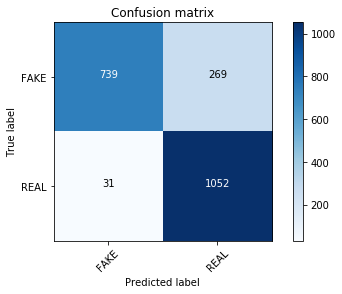

In [40]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.893
Confusion matrix, without normalization
[[ 865  143]
 [  80 1003]]


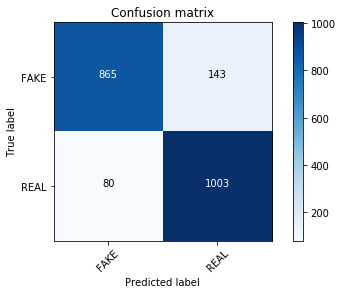

In [42]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])